# Dataloader에 대해서 공부하기

- torchvision.transforms.Compose를 통해서 방대한 데이터 이미지를 변환할 수 있다.

## 1. 필요한 모듈 불러오기

In [1]:
import os
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

from skimage import transform
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
#-- cuda 확인
device = "cuda" if torch.cuda.is_available() else "cpu"

torch.manual_seed(1)
if device == "cuda":
  torch.cuda.manual_seed_all(1)

print('Device:', device)                                    #-- output : cuda 
print('Count of using GPUs:', torch.cuda.device_count())    #-- output : 1 (하나만 사용)
print('Current cuda device:', torch.cuda.current_device())  #-- output : 0 (GPU0 사용)

Device: cuda
Count of using GPUs: 1
Current cuda device: 0


## 2. transforms.Compose 정의하기

In [3]:
transforml = transforms.Compose([
    
    transforms.Resize((224, 224)),                    #-- 이미지 크기를 (224,224)로 변경
    transforms.RandomHorizontalFlip(p=0.5),           #-- 이미지 좌우 반전 (p=0.5 : 이미지 중에서 50% 확률로만 좌우반전 실행) 
    transforms.ToTensor(),                            #-- 이미지를 pytorch tensor 타입으로 변형 (pixel값들을 0.0 ~ 1.0 사이의 값으로 변환)
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  #-- ImageNet 데이터셋의 학습에서 사용된 값들 (ImageNet 데이터셋에서 사용된 값이라서 어떤 데이터셋에서도 
                         std=[0.229, 0.224, 0.225]),  #--                                    잘 작동할것이라는 가정으로 신뢰성있게 사용)

])

In [4]:
animationPath = "/content/drive/MyDrive/yujin"

train_dataset = ImageFolder(os.path.join(animationPath,"train"),transform=transforml) 
train_loder = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=0)

# test_dataset = ImageFolder(os.path.join(animationPath,"test"),transform=transforml) 
# test_loder = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=True, numworkers=0)

numpy.ndarray

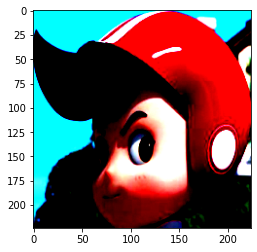

In [5]:
image = train_dataset[0][0].numpy()
image = np.transpose(image,(1,2,0))
plt.imshow(image)
type(image)

## 3. 사용자 정의 class 구현

In [6]:
class Rescale(object):
    def __init__(self, output_size):                  
        assert isinstance(output_size, (int, tuple))  #-- assert(가정 설정문) : 뒤의 조건이 True가 아니면 AssertError를 발생
                                                      #-- isinstance(size, int) : size 형태가 int타입인지 확인 (맞으면 True, 틀리면 False)
        self.output_size = output_size

    def __call__(self, image):

        h, w = image.shape[:2]
        if isinstance(self.output_size, int):
            if h > w:
                new_h, new_w = self.output_size * h / w, self.output_size
            else:
                new_h, new_w = self.output_size, self.output_size * w / h
        else:
            new_h, new_w = self.output_size

        new_h, new_w = int(new_h), int(new_w)

        result = transform.resize(image, (new_h, new_w))
        return result

class RandomCrop(object):
    def __init__(self, size):
        assert isinstance(size, int)
        if isinstance(size, int):
            self.output_size = (size,size)   #-- size를 튜플형태로 맞춰준다.
        else: 
            assert len(size) ==2
            self.output_size = size

    def __call__(self, image):
        h, w = image.shape[:2]
        new_h, new_w = self.output_size

        top_crop = np.random.randint(0, h-new_h)
        left_crop = np.random.randint(0, w-new_w)

        result = image[top_crop: top_crop+new_h,
                      left_crop:left_crop+new_w]
        return result

## 4. 새롭게 정의한 class를 transforms로 묶어주기

In [7]:
#-- 결과 확인
scale = Rescale(24)
crop = RandomCrop(18)

compose = transforms.Compose([
    Rescale(24),
    RandomCrop(18)
])

## 5. 데이터 증강 결과 시각화

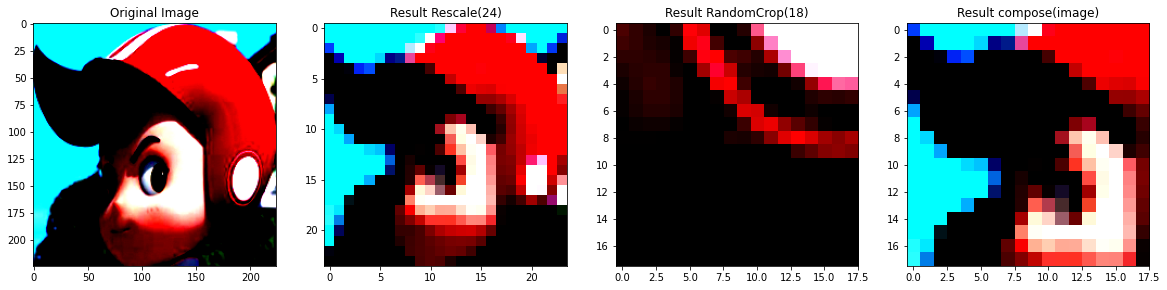

In [8]:
#-- visualization
fig, ax = plt.subplots(1,4, figsize=(20,10))
ax[0].set_title("Original Image")
ax[0].imshow(image)
ax[1].set_title("Result Rescale(24)")
ax[1].imshow(scale(image))
ax[2].set_title("Result RandomCrop(18)")
ax[2].imshow(crop(image))
ax[3].set_title("Result compose(image)")
ax[3].imshow(compose(image))